In [303]:
import pandas as pd  # For data manipulation
import glob  # For file handling
from pyproj import Transformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [305]:
folder_path = '/Users/sofianebelbrik/Documents/water pollution/Data/Raw/'

In [307]:
years = range(2020, 2025)

In [309]:
# Creating an empty list to store file paths
files = []

# Looping through each year and find the corresponding CSV files
for year in years:
    file_pattern = folder_path + f'{year}-M.csv'  # Format file name pattern
    files.extend(glob.glob(file_pattern))  # Append all matching files to the list

# Printing the files that were found
print("Files found:", files)

# Loading all CSV files into a list of DataFrames
df_list = [pd.read_csv(file) for file in files]  # Read each file into a DataFrame

# Concatenating all DataFrames into one large DataFrame
data_2020_2025 = pd.concat(df_list, ignore_index=True)

# Displaying the shape of the final dataset (for debugging)
print("Final dataset shape:", data_2020_2025.shape)  



Files found: ['/Users/sofianebelbrik/Documents/water pollution/Data/Raw/2020-M.csv', '/Users/sofianebelbrik/Documents/water pollution/Data/Raw/2021-M.csv', '/Users/sofianebelbrik/Documents/water pollution/Data/Raw/2022-M.csv', '/Users/sofianebelbrik/Documents/water pollution/Data/Raw/2023-M.csv', '/Users/sofianebelbrik/Documents/water pollution/Data/Raw/2024-M.csv']
Final dataset shape: (5877147, 17)


In [310]:
df_list = [pd.read_csv(file) for file in files]
data_2020_2024 = pd.concat(df_list, ignore_index=True)
print(data_2020_2024.shape) 

(5877147, 17)


In [96]:
data_2020_2024.head()

,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2020-01-23T13:30:00,O Diss %sat,"Oxygen, Dissolved, % Saturation",9901,NaN,92.200,NaN,%,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2020-01-23T13:30:00,Orthophospht,"Orthophosphate, reactive as P",180,NaN,0.130,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2020-01-23T13:30:00,Alky pH 4.5,Alkalinity to pH 4.5 as CaCO3,162,NaN,220.000,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2020-01-23T13:30:00,Ammonia(N),Ammoniacal Nitrogen as N,111,NaN,0.053,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2020-01-23T13:30:00,Temp Water,Temperature of Water,76,NaN,7.000,NaN,cel,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400


In [98]:
# Defining columns to retain
columns_to_keep = [
    'sample.sampleDateTime',   # Timestamp of the sample collection
    'determinand.label',       # Water quality parameter name
    'result',                  # Measurement value of the parameter
    'determinand.unit.label',  # Unit of measurement
    'sample.samplingPoint.easting',  # X coordinate of the sampling location
    'sample.samplingPoint.northing', # Y coordinate of the sampling location
    'sample.sampledMaterialType.label'  # Type of water 
]

# Keeping only these columns in the dataset
data_2020_2024 = data_2020_2024[columns_to_keep]

# Displaying the first few rows for verification
print("Preview of filtered dataset:")
print(data_2020_2024.head())

Preview of filtered dataset:
  sample.sampleDateTime determinand.label   result determinand.unit.label  \
0   2020-01-23T13:30:00       O Diss %sat   92.200                      %   
1   2020-01-23T13:30:00      Orthophospht    0.130                   mg/l   
2   2020-01-23T13:30:00       Alky pH 4.5  220.000                   mg/l   
3   2020-01-23T13:30:00        Ammonia(N)    0.053                   mg/l   
4   2020-01-23T13:30:00        Temp Water    7.000                    cel   

   sample.samplingPoint.easting  sample.samplingPoint.northing  \
0                        463800                         241400   
1                        463800                         241400   
2                        463800                         241400   
3                        463800                         241400   
4                        463800                         241400   

  sample.sampledMaterialType.label  
0    RIVER / RUNNING SURFACE WATER  
1    RIVER / RUNNING SURFACE WATER  


In [100]:
# Listing unique values in 'determinand.label' column 
unique_determinand_labels = data_2020_2024['determinand.label'].unique()

# Displaying unique parameter names
print("Unique water quality parameters in dataset:")
print(unique_determinand_labels)

Unique water quality parameters in dataset:
['O Diss %sat' 'Orthophospht' 'Alky pH 4.5' ... 'Type of Flow'
 'Num Bathers' 'Amonia-N DWt']


In [102]:
# Defining the key water quality parameters to keep
key_parameters = [
    'O Diss %sat',   # Oxygen Dissolved Percentage Saturation
    'Orthophospht',   # Orthophosphate
    'Ammonia(N)',     # Ammonia Nitrogen
    'Temp Water',     # Water Temperature
    'pH',             # pH Level
    'Nitrite-N',      # Nitrite Nitrogen
    'Nitrate-N',      # Nitrate Nitrogen
    'TurbidityNTU',   # Turbidity
    'BOD ATU',        # Biochemical Oxygen Demand
    'Phosphorus-P'    # Phosphorus
]

# Filtering the dataset to keep only these parameters
data_2020_2024 = data_2020_2024[data_2020_2024['determinand.label'].isin(key_parameters)]

# Confirming the filtering
print("Dataset shape after filtering key water parameters:", data_2020_2024.shape)

Dataset shape after filtering key water parameters: (1568295, 7)


In [104]:
# Listing unique water types present in the dataset
unique_water_types = data_2020_2024['sample.sampledMaterialType.label'].unique()

# Displaying unique water types
print("Unique water types in dataset:")
print(unique_water_types)

Unique water types in dataset:
['RIVER / RUNNING SURFACE WATER' 'POND / LAKE / RESERVOIR WATER'
 'GROUNDWATER' 'FINAL SEWAGE EFFLUENT' 'ANY TRADE EFFLUENT'
 'ESTUARINE WATER' 'ANY SEWAGE' 'SEA WATER'
 'GROUNDWATER - PURGED/PUMPED/REFILLED' 'CANAL WATER'
 'TRADE EFFLUENT - GROUNDWATER RETURNED ABSTRACTED'
 'GROUNDWATER - STATIC/UNPURGED' 'ANY LEACHATE' 'LANDFILL WASTE'
 'ANY WATER' 'SURFACE DRAINAGE' 'CRUDE SEWAGE'
 'STORM SEWER OVERFLOW DISCHARGE'
 'TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED'
 'ANY SOLID/SEDIMENT - UNSPECIFIED' 'MINEWATER' 'SOIL'
 'CANAL WATER - SALINE' 'PRECIPITATION' 'WASTE - BULK MATERIAL'
 'ESTUARINE WATER AT HIGH TIDE' 'MINEWATER (FLOWING/PUMPED)'
 'ANY NON-AQUEOUS LIQUID' 'COASTAL / MARINE SEDIMENT'
 'POND / LAKE / RESERVOIR WATER SEDIMENT - <63UM FRACTION'
 'RUNNING SURFACE WATER SEDIMENT' 'ESTUARY SEDIMENT' 'UNCODED'
 'ANY AGRICULTURAL' 'ANY BIOTA' 'CONSTRUCTION WASTE' 'CALIBRATION WATER'
 'STORM TANK EFFLUENT' 'CANAL WATER SEDIMENT'
 'POND / LAKE / RESERV

In [106]:
# Defining relevant water types for drinking and bathing
key_water_types = [
    'GROUNDWATER',  # Underground water (important for drinking)
    'RIVER / RUNNING SURFACE WATER',  # Flowing water bodies
    'POND / LAKE / RESERVOIR WATER'  # Still water bodies
]

# Filtering dataset to keep only these water types
data_2020_2024 = data_2020_2024[data_2020_2024['sample.sampledMaterialType.label'].isin(key_water_types)]

# Confirming the filtering
print("Dataset shape after filtering key water types:", data_2020_2024.shape)

Dataset shape after filtering key water types: (1474470, 7)


In [108]:
print("Number of unique Easting values:", data_2020_2024['sample.samplingPoint.easting'].nunique())
print("Number of unique Northing values:", data_2020_2024['sample.samplingPoint.northing'].nunique())

Number of unique Easting values: 11212
Number of unique Northing values: 11331


In [286]:
data_2020_2024.head(40)

,sample.sampleDateTime,determinand.label,result,determinand.unit.label,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label
0,2020-01-23 13:30:00,O Diss %sat,92.200,%,463800,241400,RIVER / RUNNING SURFACE WATER
1,2020-01-23 13:30:00,Orthophospht,0.130,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER
3,2020-01-23 13:30:00,Ammonia(N),0.053,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER
4,2020-01-23 13:30:00,Temp Water,7.000,°C,463800,241400,RIVER / RUNNING SURFACE WATER
6,2020-01-23 13:30:00,pH,7.960,pH,463800,241400,RIVER / RUNNING SURFACE WATER
10,2020-01-23 13:30:00,Nitrate-N,5.980,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER
11,2020-01-23 13:30:00,BOD ATU,1.400,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER
12,2020-01-23 13:30:00,Nitrite-N,0.025,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER
13,2020-02-13 13:09:00,pH,8.110,pH,463800,241400,RIVER / RUNNING SURFACE WATER
15,2020-02-13 13:09:00,Nitrate-N,2.790,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER


In [112]:
# Finding unique measurement units for each parameter
units_per_parameter = data_2020_2024.groupby("determinand.label", observed=False)["determinand.unit.label"].unique()

# Converting to a DataFrame for better readability
units_data_2020_2024 = units_per_parameter.explode().reset_index()

# Displaying the units for each parameter
print("Measurement units for each water quality parameter:")
print(units_data_2020_2024)

Measurement units for each water quality parameter:
  determinand.label determinand.unit.label
0        Ammonia(N)                   mg/l
1           BOD ATU                   mg/l
2         Nitrate-N                   mg/l
3         Nitrite-N                   mg/l
4       O Diss %sat                      %
5      Orthophospht                   mg/l
6      Phosphorus-P                   mg/l
7        Temp Water                    cel
8      TurbidityNTU                    ntu
9                pH                phunits


In [114]:
num_unique_locations = data_2020_2024[['sample.samplingPoint.easting', 'sample.samplingPoint.northing']].drop_duplicates().shape[0]
print(f"Number of Unique Locations: {num_unique_locations}")

Number of Unique Locations: 11944


In [116]:
# Converting the 'sample.sampleDateTime' column to datetime format for time-based analysis
data_2020_2024['sample.sampleDateTime'] = pd.to_datetime(data_2020_2024['sample.sampleDateTime'], errors='coerce')

# Verifying conversion by checking the first few values
print("DateTime conversion preview:")
print(data_2020_2024['sample.sampleDateTime'].head())

DateTime conversion preview:
0   2020-01-23 13:30:00
1   2020-01-23 13:30:00
3   2020-01-23 13:30:00
4   2020-01-23 13:30:00
6   2020-01-23 13:30:00
Name: sample.sampleDateTime, dtype: datetime64[ns]


In [118]:
data_2020_2024.isnull().sum()

sample.sampleDateTime               0
determinand.label                   0
result                              0
determinand.unit.label              0
sample.samplingPoint.easting        0
sample.samplingPoint.northing       0
sample.sampledMaterialType.label    0
dtype: int64

In [120]:
# Removing duplicate rows to prevent redundant data
data_2020_2024.drop_duplicates(inplace=True)

# Confirming the number of unique rows after dropping duplicates
print("Dataset shape after removing duplicates:", data_2020_2024.shape)

Dataset shape after removing duplicates: (1474466, 7)


In [122]:
# Dictionary to map inconsistent unit names to standard ones
unit_conversion = {
    "cel": "°C",       # Convert temperature unit to Celsius symbol
    "mg/l": "mg/L",    # Standardize milligrams per liter (mg/L)
    "ntu": "NTU",      # Standardize Turbidity unit
    "phunits": "pH"    # Simplify pH unit name
}

# Applying unit conversion mapping to the 'determinand.unit.label' column
data_2020_2024["determinand.unit.label"] = data_2020_2024["determinand.unit.label"].replace(unit_conversion)

# Displaying unique unit values after standardization
print("Unique units after standardization:", data_2020_2024["determinand.unit.label"].unique())

Unique units after standardization: ['%' 'mg/L' '°C' 'pH' 'NTU']


In [236]:
# Pivoting the data to restructure it: each parameter becomes a separate column
data_pivot = data_2020_2024.pivot_table(
    index=["sample.sampleDateTime", "sample.samplingPoint.easting", "sample.samplingPoint.northing"],  
    columns="determinand.label",  
    values="result"
).reset_index()

# Renaming columns for better clarity
data_pivot.columns.name = None  # Remove the MultiIndex column name

# Displaying the first few rows
print("Pivoted dataset preview:")
print(data_pivot.head())

Pivoted dataset preview:
  sample.sampleDateTime  sample.samplingPoint.easting  \
0   2020-01-02 08:20:00                        512248   
1   2020-01-02 11:25:00                        512242   
2   2020-01-02 11:33:00                        479766   
3   2020-01-02 12:12:00                        271427   
4   2020-01-02 12:27:00                        473010   

   sample.samplingPoint.northing  Ammonia(N)  BOD ATU  Nitrate-N  Nitrite-N  \
0                         302927        0.50      1.7      53.90     0.1000   
1                         302941        0.50      2.8      51.90     0.1000   
2                         150096         NaN      NaN        NaN        NaN   
3                          47251        0.03      NaN       2.69     0.0051   
4                         140000         NaN      NaN        NaN        NaN   

   O Diss %sat  Orthophospht  Phosphorus-P  Temp Water  TurbidityNTU    pH  
0          NaN           NaN           NaN         NaN           NaN   NaN  
1  

In [238]:
data_pivot.head

<bound method NDFrame.head of        sample.sampleDateTime  sample.samplingPoint.easting  \
0        2020-01-02 08:20:00                        512248   
1        2020-01-02 11:25:00                        512242   
2        2020-01-02 11:33:00                        479766   
3        2020-01-02 12:12:00                        271427   
4        2020-01-02 12:27:00                        473010   
...                      ...                           ...   
226214   2024-12-16 10:56:00                        464978   
226215   2024-12-16 11:02:00                        470000   
226216   2024-12-16 11:12:00                        464978   
226217   2024-12-16 11:18:00                        464978   
226218   2024-12-18 09:55:00                        334600   

        sample.samplingPoint.northing  Ammonia(N)  BOD ATU  Nitrate-N  \
0                              302927        0.50      1.7      53.90   
1                              302941        0.50      2.8      51.90   
2     

In [273]:
data_pivot.head()

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammonia(N),BOD ATU,Nitrate-N,Nitrite-N,O Diss %sat,Orthophospht,Phosphorus-P,...,Ammonia(N)_rolling7,BOD ATU_rolling7,Nitrate-N_rolling7,Nitrite-N_rolling7,O Diss %sat_rolling7,Orthophospht_rolling7,Phosphorus-P_rolling7,Temp Water_rolling7,TurbidityNTU_rolling7,pH_rolling7
4686,2020-01-21 11:19:00,135954,32379,0.03,1.0,5.00,0.004,100.0,0.014,0.1000,...,0.030,1.000000,5.000,0.004,100.000000,0.014000,0.100000,8.600000,9.400000,7.050000
11225,2020-02-21 13:09:00,135954,32379,0.03,5.7,4.80,0.004,100.0,0.012,0.0071,...,0.030,3.350000,4.900,0.004,100.000000,0.013000,0.053550,9.200000,5.750000,7.190000
12385,2020-03-02 13:15:00,135954,32379,0.03,3.0,4.60,0.004,101.6,0.012,0.0260,...,0.030,3.233333,4.800,0.004,100.533333,0.012667,0.044367,9.166667,4.166667,7.256667
37124,2021-06-15 14:23:00,135954,32379,0.03,1.4,3.50,0.004,101.3,0.010,0.1100,...,0.030,2.775000,4.475,0.004,100.725000,0.012000,0.060775,10.925000,3.375000,7.310000
42485,2021-07-27 14:57:00,135954,32379,0.04,2.3,4.54,0.059,93.8,0.345,0.3535,...,0.032,2.680000,4.488,0.015,99.340000,0.078600,0.119320,12.000000,3.620000,7.374000


In [242]:
# Calculating the percentage of missing values in each column
missing_percent = (data_pivot.isnull().sum() / len(data_pivot)) * 100

# Print missing values percentage
print("Missing Values Percentage:\n", missing_percent)

Missing Values Percentage:
 sample.sampleDateTime             0.000000
sample.samplingPoint.easting      0.000000
sample.samplingPoint.northing     0.000000
Ammonia(N)                       14.382523
BOD ATU                          76.057272
Nitrate-N                        19.241089
Nitrite-N                        16.528674
O Diss %sat                      20.460704
Orthophospht                     15.870020
Phosphorus-P                     69.063607
Temp Water                        7.741171
TurbidityNTU                     91.346439
pH                               17.553786
dtype: float64


In [244]:
# Sorting the dataset by date to ensure proper filling
data_pivot.sort_values(by=["sample.sampleDateTime"], inplace=True)

In [246]:
# Forwarding fill: fills missing values using the last known value
data_pivot.ffill(inplace=True)

# Backwarding fill: fills missing values using the next known value (if any remain)
data_pivot.bfill(inplace=True)

In [292]:
data_2020_2024

,sample.sampleDateTime,determinand.label,result,determinand.unit.label,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label
0,2020-01-23 13:30:00,O Diss %sat,92.200,%,463800,241400,RIVER / RUNNING SURFACE WATER
1,2020-01-23 13:30:00,Orthophospht,0.130,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER
3,2020-01-23 13:30:00,Ammonia(N),0.053,mg/L,463800,241400,RIVER / RUNNING SURFACE WATER
4,2020-01-23 13:30:00,Temp Water,7.000,°C,463800,241400,RIVER / RUNNING SURFACE WATER
6,2020-01-23 13:30:00,pH,7.960,pH,463800,241400,RIVER / RUNNING SURFACE WATER


,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,TurbidityNTU,TurbidityNTU_lag1,TurbidityNTU_lag2
0,2020-01-21 11:19:00,135954,32379,9.4,9.4,9.4
1,2020-02-21 13:09:00,135954,32379,2.1,9.4,9.4
2,2020-03-02 13:15:00,135954,32379,1.0,2.1,9.4
3,2021-06-15 14:23:00,135954,32379,1.0,1.0,2.1
4,2021-07-27 14:57:00,135954,32379,4.6,1.0,1.0
5,2021-08-04 13:40:00,135954,32379,21.7,4.6,1.0
6,2021-09-23 12:06:00,135954,32379,4.8,21.7,4.6
7,2021-10-13 11:52:00,135954,32379,7.0,4.8,21.7
8,2021-11-16 14:32:00,135954,32379,2.6,7.0,4.8
9,2021-12-14 13:50:00,135954,32379,3.1,2.6,7.0


In [248]:
# Confirm that all missing values have been handled
print("Missing values after filling:\n", data_pivot.isnull().sum())  # Should print all 0s

Missing values after filling:
 sample.sampleDateTime            0
sample.samplingPoint.easting     0
sample.samplingPoint.northing    0
Ammonia(N)                       0
BOD ATU                          0
Nitrate-N                        0
Nitrite-N                        0
O Diss %sat                      0
Orthophospht                     0
Phosphorus-P                     0
Temp Water                       0
TurbidityNTU                     0
pH                               0
dtype: int64


In [138]:
data_pivot.head()

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammonia(N),BOD ATU,Nitrate-N,Nitrite-N,O Diss %sat,Orthophospht,Phosphorus-P,Temp Water,TurbidityNTU,pH
0,2020-01-02 08:20:00,512248,302927,0.50,1.7,53.90,0.1000,89.4,0.021,0.037,10.5,5.0,7.36
1,2020-01-02 11:25:00,512242,302941,0.50,2.8,51.90,0.1000,89.4,0.021,0.037,10.5,5.0,7.36
2,2020-01-02 11:33:00,479766,150096,0.50,2.8,51.90,0.1000,89.4,0.021,0.037,10.5,5.0,7.36
3,2020-01-02 12:12:00,271427,47251,0.03,2.8,2.69,0.0051,100.0,0.021,0.037,8.6,5.0,7.60
4,2020-01-02 12:27:00,473010,140000,0.03,2.8,2.69,0.0051,88.4,0.021,0.037,9.9,5.0,7.74


In [142]:
# Check the number of unique locations in the data based on Easting and Northing
unique_locations = data_pivot[['sample.samplingPoint.easting', 'sample.samplingPoint.northing']]
num_unique_locations = unique_locations.shape[0]

num_unique_locations

226219

In [144]:
# Count unique locations in data_pivot
num_unique_locations_pivot = data_pivot[['sample.samplingPoint.easting', 'sample.samplingPoint.northing']].drop_duplicates().shape[0]
print(f"Unique locations in data_pivot: {num_unique_locations_pivot}")

Unique locations in data_pivot: 11944


In [252]:

# Definin the outlier detection function using the IQR method
def detect_outliers_iqr(df, columns):
    """
    Detect outliers in the given DataFrame 'df' for the specified 'columns'
    using the Interquartile Range (IQR) method.
    """
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                # Interquartile Range

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers in the column
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = {
            "Outlier Count": outlier_count,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound
        }
    
    # Converting the dictionary to a DataFrame for easier readability
    return pd.DataFrame.from_dict(outliers, orient="index")

# Get a list of numeric columns (excluding time and location columns)
numeric_columns = [
    col for col in data_pivot.columns 
    if col not in ["sample.sampleDateTime", "sample.samplingPoint.easting", "sample.samplingPoint.northing"]
]

# Detect the outliers on the pivoted DataFrame
outlier_df = detect_outliers_iqr(data_pivot, numeric_columns)

# Displaying the outlier detection results
print("Outlier Detection Results:")
print(outlier_df)

Outlier Detection Results:
              Outlier Count  Lower Bound  Upper Bound
Ammonia(N)            32636      -0.0435       0.1525
BOD ATU               20755      -1.5000       5.7000
Nitrate-N              7198      -7.3450      15.8950
Nitrite-N             18624      -0.0410       0.0790
O Diss %sat           20769      64.8500     120.4500
Orthophospht          21507      -0.1750       0.3450
Phosphorus-P          19633      -0.1625       0.3535
Temp Water              232      -1.7000      23.9000
TurbidityNTU          26437      -9.5000      21.7000
pH                     8860       6.8650       8.8250


In [254]:
# Creating a list of numeric columns, excluding datetime and location columns.
numeric_columns = [
    col for col in data_pivot.columns 
    if col not in ["sample.sampleDateTime", "sample.samplingPoint.easting", "sample.samplingPoint.northing"]
]

# Printing summary statistics BEFORE winsorization.
print("Summary Statistics BEFORE Winsorization:")
print(data_pivot[numeric_columns].describe())

# Defining the winsorization function.
def winsorize_series(series, factor=1.5):
    """
    Winsorize a Pandas Series using the Interquartile Range (IQR) method.
    
    Parameters:
        series (pd.Series): The data series to winsorize.
        factor (float): The multiplier for the IQR to determine bounds (default is 1.5).
    
    Returns:
        pd.Series: The winsorized series where values below the lower bound are set to the lower bound
                   and values above the upper bound are set to the upper bound.
    """
    # Calculating the first and third quartiles.
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    # Calculating the Interquartile Range (IQR).
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds based on the factor.
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Cliping the series so that all values fall within the lower and upper bounds.
    return series.clip(lower=lower_bound, upper=upper_bound)

# Applying winsorization to each numeric column in data_pivot.
for col in numeric_columns:
    data_pivot[col] = winsorize_series(data_pivot[col])

# Printing summary statistics AFTER winsorization to see how the distribution has changed.
print("\nSummary Statistics AFTER Winsorization:")
print(data_pivot[numeric_columns].describe())

Summary Statistics BEFORE Winsorization:
          Ammonia(N)        BOD ATU      Nitrate-N      Nitrite-N  \
count  226219.000000  226219.000000  226219.000000  226219.000000   
mean        0.493244      19.988255       4.943633       0.034184   
std        14.977702     440.588391       4.970348       0.182239   
min         0.000000       1.000000       0.000010       0.000300   
25%         0.030000       1.200000       1.370000       0.004000   
50%         0.030000       1.700000       3.780000       0.014000   
75%         0.079000       3.000000       7.180000       0.034000   
max      5100.000000   36000.000000     690.000000      42.000000   

         O Diss %sat   Orthophospht   Phosphorus-P     Temp Water  \
count  226219.000000  226219.000000  226219.000000  226219.000000   
mean       90.656192       0.214022       0.153291      11.130185   
std        17.840164       2.486790       0.490356       4.216581   
min         0.000000       0.000000       0.001000       0.00

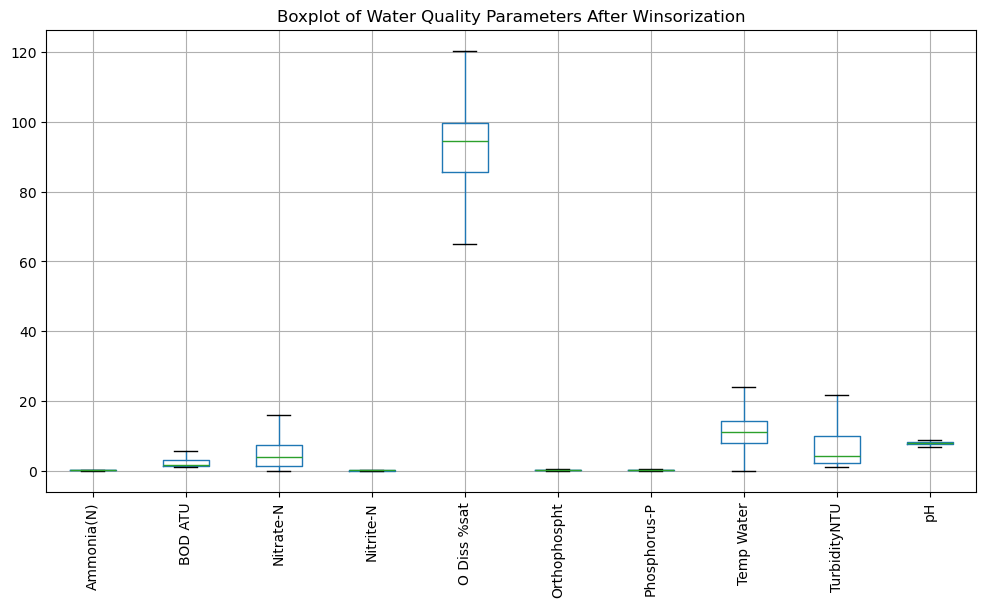

In [160]:
plt.figure(figsize=(12, 6))
data_pivot[numeric_columns].boxplot(rot=90)
plt.title("Boxplot of Water Quality Parameters After Winsorization")
plt.show()

In [256]:
# Extracting the year from the sample date/time
data_pivot['year'] = data_pivot['sample.sampleDateTime'].dt.year

# Extracting the month from the sample date/time
data_pivot['month'] = data_pivot['sample.sampleDateTime'].dt.month

# Extracting the day of the month from the sample date/time
data_pivot['day'] = data_pivot['sample.sampleDateTime'].dt.day

# Extracting the day of the week (0=Monday, 6=Sunday) from the sample date/time
data_pivot['day_of_week'] = data_pivot['sample.sampleDateTime'].dt.dayofweek

In [258]:
# Extracting spatial features (Easting and Northing) from the DataFrame.
spatial_features = data_pivot[['sample.samplingPoint.easting', 'sample.samplingPoint.northing']]

# Initialising KMeans with 10 clusters.
# The 'random_state=42' parameter ensures that the clustering is reproducible.
kmeans = KMeans(n_clusters=10, random_state=42)

# Fitting the KMeans model on the spatial features and assign each row a cluster label.

data_pivot['location_cluster'] = kmeans.fit_predict(spatial_features)

print("Cluster Centers (Easting, Northing):")
print(kmeans.cluster_centers_)

print("Samples per Cluster:")
print(data_pivot['location_cluster'].value_counts())

Cluster Centers (Easting, Northing):
[[425599.27903958 465574.09778553]
 [344330.63502617 126505.18107229]
 [542887.75816584 164909.53055076]
 [487855.99325851 339871.94804462]
 [406709.22983031 234443.78301365]
 [372464.41066125 549783.89797374]
 [457027.91485014 100959.85517711]
 [594025.1937622  282511.84298988]
 [377102.51845101 357386.93428775]
 [224745.7633764   71005.3970422 ]]
Samples per Cluster:
location_cluster
3    28387
2    27217
5    26606
0    24483
4    23653
8    22444
6    22023
9    20353
7    16897
1    14156
Name: count, dtype: int64


In [260]:
data_pivot.head()


,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammonia(N),BOD ATU,Nitrate-N,Nitrite-N,O Diss %sat,Orthophospht,Phosphorus-P,Temp Water,TurbidityNTU,pH,year,month,day,day_of_week,location_cluster
0,2020-01-02 08:20:00,512248,302927,0.1525,1.7,15.895,0.0790,89.4,0.021,0.037,10.5,5.0,7.36,2020,1,2,3,3
1,2020-01-02 11:25:00,512242,302941,0.1525,2.8,15.895,0.0790,89.4,0.021,0.037,10.5,5.0,7.36,2020,1,2,3,3
2,2020-01-02 11:33:00,479766,150096,0.1525,2.8,15.895,0.0790,89.4,0.021,0.037,10.5,5.0,7.36,2020,1,2,3,6
3,2020-01-02 12:12:00,271427,47251,0.0300,2.8,2.690,0.0051,100.0,0.021,0.037,8.6,5.0,7.60,2020,1,2,3,9
4,2020-01-02 12:27:00,473010,140000,0.0300,2.8,2.690,0.0051,88.4,0.021,0.037,9.9,5.0,7.74,2020,1,2,3,6


In [262]:
"""
This script processes the 'data_pivot' DataFrame by:
1. Sorting the data by spatial coordinates and time.
2. Computing a 7-observation rolling average for each numeric column,
   grouped by unique spatial locations (defined by easting and northing).
"""
data_pivot = data_pivot.sort_values(
    by=['sample.samplingPoint.easting', 'sample.samplingPoint.northing', 'sample.sampleDateTime']
)

# Looping through each numeric column
# and compute a 7-observation rolling average for each unique location.
for col in numeric_columns:
    # Creating a new column name for the rolling average (e.g., "pH_rolling7" for a column named "pH")
    new_col = f"{col}_rolling7"
    
    # Grouping by spatial location and calculate the rolling mean with a window of 7 observations.
    # The 'min_periods=1' parameter ensures that even if there are fewer than 7 observations,
    # the mean is computed from the available data.
    data_pivot[new_col] = (
        data_pivot.groupby(['sample.samplingPoint.easting', 'sample.samplingPoint.northing'])[col]
                  .rolling(window=7, min_periods=1)
                  .mean()
                  .reset_index(level=[0, 1], drop=True)
    )


print("Data sample with rolling averages:")
print(data_pivot.head())


Data sample with rolling averages:
      sample.sampleDateTime  sample.samplingPoint.easting  \
4686    2020-01-21 11:19:00                        135954   
11225   2020-02-21 13:09:00                        135954   
12385   2020-03-02 13:15:00                        135954   
37124   2021-06-15 14:23:00                        135954   
42485   2021-07-27 14:57:00                        135954   

       sample.samplingPoint.northing  Ammonia(N)  BOD ATU  Nitrate-N  \
4686                           32379        0.03      1.0       5.00   
11225                          32379        0.03      5.7       4.80   
12385                          32379        0.03      3.0       4.60   
37124                          32379        0.03      1.4       3.50   
42485                          32379        0.04      2.3       4.54   

       Nitrite-N  O Diss %sat  Orthophospht  Phosphorus-P  ...  \
4686       0.004        100.0         0.014        0.1000  ...   
11225      0.004        100.0    

In [264]:
data_pivot.head()

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammonia(N),BOD ATU,Nitrate-N,Nitrite-N,O Diss %sat,Orthophospht,Phosphorus-P,...,Ammonia(N)_rolling7,BOD ATU_rolling7,Nitrate-N_rolling7,Nitrite-N_rolling7,O Diss %sat_rolling7,Orthophospht_rolling7,Phosphorus-P_rolling7,Temp Water_rolling7,TurbidityNTU_rolling7,pH_rolling7
4686,2020-01-21 11:19:00,135954,32379,0.03,1.0,5.00,0.004,100.0,0.014,0.1000,...,0.030,1.000000,5.000,0.004,100.000000,0.014000,0.100000,8.600000,9.400000,7.050000
11225,2020-02-21 13:09:00,135954,32379,0.03,5.7,4.80,0.004,100.0,0.012,0.0071,...,0.030,3.350000,4.900,0.004,100.000000,0.013000,0.053550,9.200000,5.750000,7.190000
12385,2020-03-02 13:15:00,135954,32379,0.03,3.0,4.60,0.004,101.6,0.012,0.0260,...,0.030,3.233333,4.800,0.004,100.533333,0.012667,0.044367,9.166667,4.166667,7.256667
37124,2021-06-15 14:23:00,135954,32379,0.03,1.4,3.50,0.004,101.3,0.010,0.1100,...,0.030,2.775000,4.475,0.004,100.725000,0.012000,0.060775,10.925000,3.375000,7.310000
42485,2021-07-27 14:57:00,135954,32379,0.04,2.3,4.54,0.059,93.8,0.345,0.3535,...,0.032,2.680000,4.488,0.015,99.340000,0.078600,0.119320,12.000000,3.620000,7.374000


In [217]:

data_pivot.head()

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammonia(N),BOD ATU,Nitrate-N,Nitrite-N,O Diss %sat,Orthophospht,Phosphorus-P,...,Ammonia(N)_rolling7,BOD ATU_rolling7,Nitrate-N_rolling7,Nitrite-N_rolling7,O Diss %sat_rolling7,Orthophospht_rolling7,Phosphorus-P_rolling7,Temp Water_rolling7,TurbidityNTU_rolling7,pH_rolling7
4686,2020-01-21 11:19:00,135954,32379,0.03,1.0,5.00,0.004,100.0,0.014,0.1000,...,0.030,1.000000,5.000,0.004,100.000000,0.014000,0.100000,8.600000,9.400000,7.050000
11225,2020-02-21 13:09:00,135954,32379,0.03,5.7,4.80,0.004,100.0,0.012,0.0071,...,0.030,3.350000,4.900,0.004,100.000000,0.013000,0.053550,9.200000,5.750000,7.190000
12385,2020-03-02 13:15:00,135954,32379,0.03,3.0,4.60,0.004,101.6,0.012,0.0260,...,0.030,3.233333,4.800,0.004,100.533333,0.012667,0.044367,9.166667,4.166667,7.256667
37124,2021-06-15 14:23:00,135954,32379,0.03,1.4,3.50,0.004,101.3,0.010,0.1100,...,0.030,2.775000,4.475,0.004,100.725000,0.012000,0.060775,10.925000,3.375000,7.310000
42485,2021-07-27 14:57:00,135954,32379,0.04,2.3,4.54,0.059,93.8,0.345,0.3535,...,0.032,2.680000,4.488,0.015,99.340000,0.078600,0.119320,12.000000,3.620000,7.374000


In [266]:
"""
Lag Feature Engineering for Water Quality Data
------------------------------------------------
This script creates lag features for numeric water quality parameters
from the 'data_pivot' DataFrame. For each unique location, it calculates:
    - A 1-step lag (previous observation)
    - A 2-step lag (observation before the previous one)
After creating the lag features, missing values are handled via forward-fill
followed by backward-fill within each location group.
"""

 # Create a copy of data_pivot for lag feature engineering
data_lag = data_pivot.copy()

# Looping through each numeric column and create lag features for each unique location.
for col in numeric_columns:
    # Create a new column for the 1-step lag (previous observation)
    lag1_col = f"{col}_lag1"
    data_lag[lag1_col] = data_lag.groupby(
        ['sample.samplingPoint.easting', 'sample.samplingPoint.northing']
    )[col].shift(1)
    
    # Creating a new column for the 2-step lag (the observation before the previous one)
    lag2_col = f"{col}_lag2"
    data_lag[lag2_col] = data_lag.groupby(
        ['sample.samplingPoint.easting', 'sample.samplingPoint.northing']
    )[col].shift(2)

# Handli g missing values in the lag features by applying forward-fill and backward-fill.

data_lag = data_lag.groupby(
    ['sample.samplingPoint.easting', 'sample.samplingPoint.northing']
).apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


print("Data sample with lag features and missing values handled:")
print(data_lag.head())

Data sample with lag features and missing values handled:
  sample.sampleDateTime  sample.samplingPoint.easting  \
0   2020-01-21 11:19:00                        135954   
1   2020-02-21 13:09:00                        135954   
2   2020-03-02 13:15:00                        135954   
3   2021-06-15 14:23:00                        135954   
4   2021-07-27 14:57:00                        135954   

   sample.samplingPoint.northing  Ammonia(N)  BOD ATU  Nitrate-N  Nitrite-N  \
0                          32379        0.03      1.0       5.00      0.004   
1                          32379        0.03      5.7       4.80      0.004   
2                          32379        0.03      3.0       4.60      0.004   
3                          32379        0.03      1.4       3.50      0.004   
4                          32379        0.04      2.3       4.54      0.059   

   O Diss %sat  Orthophospht  Phosphorus-P  ...  Orthophospht_lag1  \
0        100.0         0.014        0.1000  ...       

/var/folders/9s/gwrwddtn2z5fp3wkvdtfzyj00000gn/T/ipykernel_62275/1318779826.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


In [267]:
data_lag.head()

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammonia(N),BOD ATU,Nitrate-N,Nitrite-N,O Diss %sat,Orthophospht,Phosphorus-P,...,Orthophospht_lag1,Orthophospht_lag2,Phosphorus-P_lag1,Phosphorus-P_lag2,Temp Water_lag1,Temp Water_lag2,TurbidityNTU_lag1,TurbidityNTU_lag2,pH_lag1,pH_lag2
0,2020-01-21 11:19:00,135954,32379,0.03,1.0,5.00,0.004,100.0,0.014,0.1000,...,0.014,0.014,0.1000,0.1000,8.6,8.6,9.4,9.4,7.05,7.05
1,2020-02-21 13:09:00,135954,32379,0.03,5.7,4.80,0.004,100.0,0.012,0.0071,...,0.014,0.014,0.1000,0.1000,8.6,8.6,9.4,9.4,7.05,7.05
2,2020-03-02 13:15:00,135954,32379,0.03,3.0,4.60,0.004,101.6,0.012,0.0260,...,0.012,0.014,0.0071,0.1000,9.8,8.6,2.1,9.4,7.33,7.05
3,2021-06-15 14:23:00,135954,32379,0.03,1.4,3.50,0.004,101.3,0.010,0.1100,...,0.012,0.012,0.0260,0.0071,9.1,9.8,1.0,2.1,7.39,7.33
4,2021-07-27 14:57:00,135954,32379,0.04,2.3,4.54,0.059,93.8,0.345,0.3535,...,0.010,0.012,0.1100,0.0260,16.2,9.1,1.0,1.0,7.47,7.39


In [270]:
# Check for missing values per column in data_pivot
print("Missing values per column:")
print(data_lag.isnull().sum())

Missing values per column:
sample.sampleDateTime               0
sample.samplingPoint.easting        0
sample.samplingPoint.northing       0
Ammonia(N)                          0
BOD ATU                             0
Nitrate-N                           0
Nitrite-N                           0
O Diss %sat                         0
Orthophospht                        0
Phosphorus-P                        0
Temp Water                          0
TurbidityNTU                        0
pH                                  0
year                                0
month                               0
day                                 0
day_of_week                         0
location_cluster                    0
Ammonia(N)_rolling7                 0
BOD ATU_rolling7                    0
Nitrate-N_rolling7                  0
Nitrite-N_rolling7                  0
O Diss %sat_rolling7                0
Orthophospht_rolling7               0
Phosphorus-P_rolling7               0
Temp Water_rolling7    

In [193]:
data_final = data_lag.copy()

In [212]:
data_final_ = data_final.sort_values(by='sample.sampleDateTime')

In [221]:
data_final_.to_csv('final_water_quality_df.csv', index=False)